In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [11]:
data=pd.read_csv('cardio_train.csv',sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
data['bmi']=data.weight/((data.height/100)**2)

In [26]:
data.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,110,80,normal,1,0,0,1,0,21.967120
1,55,0,140,90,very high,1,0,0,1,1,34.927679
2,52,0,130,70,very high,1,0,0,0,1,23.507805
3,48,1,150,100,normal,1,0,0,1,1,28.710479
4,48,0,100,60,normal,1,0,0,0,0,23.011177


In [14]:
data = data[(data.ap_lo > 0) & (data.ap_lo <= 150)]
data = data[(data.ap_hi > 0) & (data.ap_hi <= 250)]

In [22]:
data['cholesterol'].value_counts()

cholesterol
1    51734
2     9335
3     7894
Name: count, dtype: int64

In [16]:
data.age=data.age/365
data.age=data.age.round(0).astype(int)


In [18]:
data.gender=data.gender.replace([1,2],[0,1])

In [20]:
data.drop(['id','height','weight'],axis=1,inplace=True)

In [30]:
data_ohe=pd.get_dummies(data,columns=['cholesterol','gluc'])

In [33]:
# Convert one-hot encoded columns to integers
ohe_columns = [col for col in data_ohe.columns if col.startswith('cholesterol_') or col.startswith('gluc_')]
data_ohe[ohe_columns] = data_ohe[ohe_columns].astype(int)

In [34]:
data_ohe.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_high,cholesterol_normal,cholesterol_very high,gluc_1,gluc_2,gluc_3
0,50,1,110,80,0,0,1,0,21.967120,0,1,0,1,0,0
1,55,0,140,90,0,0,1,1,34.927679,0,0,1,1,0,0
2,52,0,130,70,0,0,0,1,23.507805,0,0,1,1,0,0
3,48,1,150,100,0,0,1,1,28.710479,0,1,0,1,0,0
4,48,0,100,60,0,0,0,0,23.011177,0,1,0,1,0,0


In [35]:
X=data_ohe.drop('cardio',axis=1)
Y=data_ohe['cardio']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [41]:
lr=LogisticRegression()

In [43]:
lr.fit(X_train,y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
pred_lr=lr.predict(X_test)
accuracy_score(y_test,pred_lr)


0.7309811503141614

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
pred_rfc=rfc.predict(X_test)
accuracy_score(y_test,pred_rfc)

0.6858385693571774

In [51]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      5187
           1       0.69      0.68      0.68      5158

    accuracy                           0.69     10345
   macro avg       0.69      0.69      0.69     10345
weighted avg       0.69      0.69      0.69     10345



In [53]:
confusion_matrix(y_test,pred_rfc)

array([[3582, 1605],
       [1645, 3513]])

In [55]:
params_grid={
    'n_estimators':[100,200,300,400],
    'criterion':['gini','log_loss','entropy'],
    'max_depth':[5,10,15,20]

}

In [56]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(rfc,params_grid,cv=5)
grid.fit(X_train,y_train)



,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'log_loss', ...], 'max_depth': [5, 10, ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [59]:
rfc2=RandomForestClassifier(**grid.best_params_)

In [60]:
rfc2.fit(X_train,y_train)
pred_rfc2=rfc2.predict(X_test)
accuracy_score(y_test,pred_rfc2)

0.7373610439826003

In [61]:
confusion_matrix(y_test,pred_rfc2)

array([[4219,  968],
       [1749, 3409]])

In [62]:
from xgboost import XGBClassifier

In [63]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [64]:
pred_xgb=xgb.predict(X_test)
accuracy_score(y_test,pred_xgb)

0.7366843885935235

In [65]:
params={
    'n_estimators':[200,400,500],
    'max_depth':[5,6,10,15],
    'sub_sample':[0.7,0.8,0.9],
    'gamma':[0,0.5,1,1.5,2],
    'min_child_weight':[100,200,300]
}

In [85]:
grid_xgb=GridSearchCV(xgb,params,cv=5,verbose=1,n_jobs=-1,scoring='recall')
grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [13:29:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [13:29:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [13:29:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [13:29:17] WARNING: /Users/runner/wo

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'gamma': [0, 0.5, ...], 'max_depth': [5, 6, ...], 'min_child_weight': [100, 200, ...], 'n_estimators': [200, 400, ...], ...}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [95]:
xgb2=XGBClassifier(**grid_xgb.best_params_)
xgb2.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [16:09:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [96]:
pred_xgb2=xgb2.predict(X_test)
accuracy_score(y_test,pred_xgb2)

0.7404543257612373

In [88]:
confusion_matrix(y_test,pred_xgb2)

array([[3978, 1209],
       [1632, 3526]])

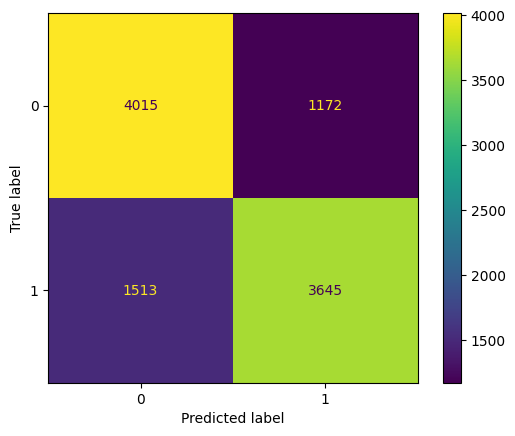

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, pred_xgb2)
plt.show()

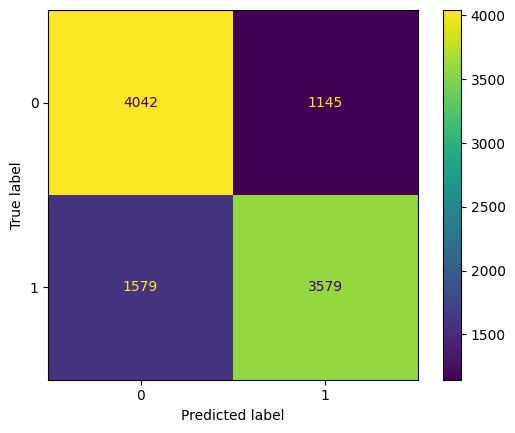

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, pred_xgb)
plt.show()

In [71]:
import matplotlib.pyplot as plt

In [100]:
print(classification_report(y_test,pred_xgb2))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      5187
           1       0.76      0.71      0.73      5158

    accuracy                           0.74     10345
   macro avg       0.74      0.74      0.74     10345
weighted avg       0.74      0.74      0.74     10345



In [84]:
print(classification_report(y_test,pred_rfc2))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      5187
           1       0.78      0.66      0.72      5158

    accuracy                           0.74     10345
   macro avg       0.74      0.74      0.74     10345
weighted avg       0.74      0.74      0.74     10345



In [98]:
y_prob = xgb2.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.45).astype(int)


In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      5187
           1       0.73      0.75      0.74      5158

    accuracy                           0.74     10345
   macro avg       0.74      0.74      0.74     10345
weighted avg       0.74      0.74      0.74     10345



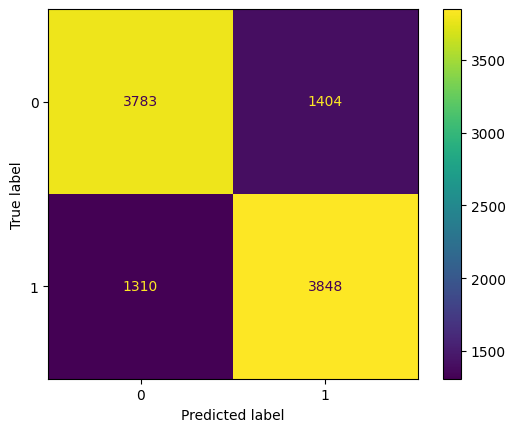

In [101]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

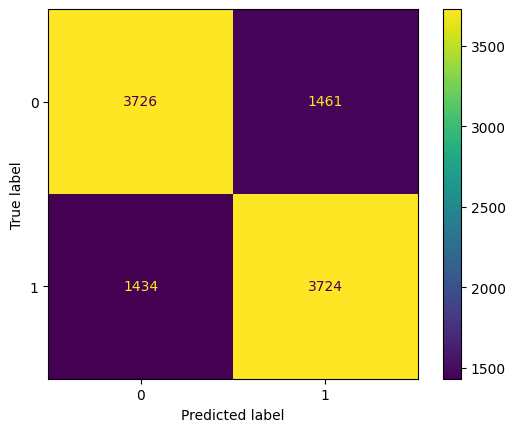

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [102]:
# Compare all models
models = {
    'Random Forest (Tuned)': pred_rfc2,
    'XGBoost (Tuned)': pred_xgb2,
    'XGBoost (Threshold 0.45)': y_pred
}

print("Model Performance Comparison\n" + "="*60)
for name, predictions in models.items():
    acc = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    print(f"\n{name}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {precision:.4f} (of predicted CVD, % actually have it)")
    print(f"  Recall:    {recall:.4f} (of actual CVD cases, % we catch)")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  False Negatives: {fn} (missed CVD cases - CRITICAL)")
    print(f"  False Positives: {fp} (false alarms)")

Model Performance Comparison

Random Forest (Tuned):
  Accuracy:  0.7374
  Precision: 0.7788 (of predicted CVD, % actually have it)
  Recall:    0.6609 (of actual CVD cases, % we catch)
  F1-Score:  0.7150
  False Negatives: 1749 (missed CVD cases - CRITICAL)
  False Positives: 968 (false alarms)

XGBoost (Tuned):
  Accuracy:  0.7405
  Precision: 0.7567 (of predicted CVD, % actually have it)
  Recall:    0.7067 (of actual CVD cases, % we catch)
  F1-Score:  0.7308
  False Negatives: 1513 (missed CVD cases - CRITICAL)
  False Positives: 1172 (false alarms)

XGBoost (Threshold 0.45):
  Accuracy:  0.7377
  Precision: 0.7327 (of predicted CVD, % actually have it)
  Recall:    0.7460 (of actual CVD cases, % we catch)
  F1-Score:  0.7393
  False Negatives: 1310 (missed CVD cases - CRITICAL)
  False Positives: 1404 (false alarms)


# Model Comparison Summary

In [103]:
import joblib

joblib.dump(xgb2,'xgb_grid.pkl')

['xgb_grid.pkl']